### Regression model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 1. Loading data from the datasets module of the Scikit-learn library

In [4]:
# if the code written earlier stops working, just run this cell
# and you will receive an already generated dataframe at the output
boston_df = pd.read_csv('/content/boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# let's see what type of variables we have to work with.
# there is a method for this.info()
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# let's look at the main statistical indicators (summary statistics)
# using the method.describe()
boston_df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Step 2. Preliminary data processing

In [7]:
# let's check if there are any missing values
boston_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


### Step 3. Research data analysis (Exploratory Data Analysis)

In [8]:
# посчитаем коэффициент корреляции для всего датафрейма и округлим значение
# получается корреляционная матрица
corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [9]:
# we can also plot scatter plots, for example,
# between the target variable MEDV and LSTAT and RM

# prepare the data (put the dataframe columns in variables)
x1 = boston_df['LSTAT']
x2 = boston_df['RM']
y = boston_df['MEDV']

Text(0.5, 1.0, 'Social status of the population and housing prices')

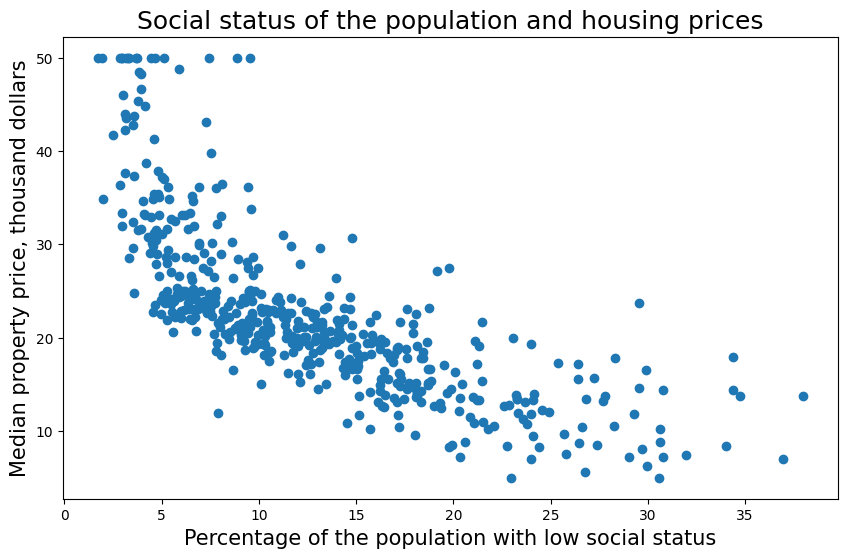

In [10]:
# let's set the size and build the first graph
plt.figure(figsize = (10,6))
plt.scatter(x1, y)

# adding signatures
plt.xlabel('Percentage of the population with low social status', fontsize = 15)
plt.ylabel('Median property price, thousand dollars', fontsize = 15)
plt.title('Social status of the population and housing prices', fontsize = 18)

Text(0.5, 1.0, 'Average number of rooms and house prices')

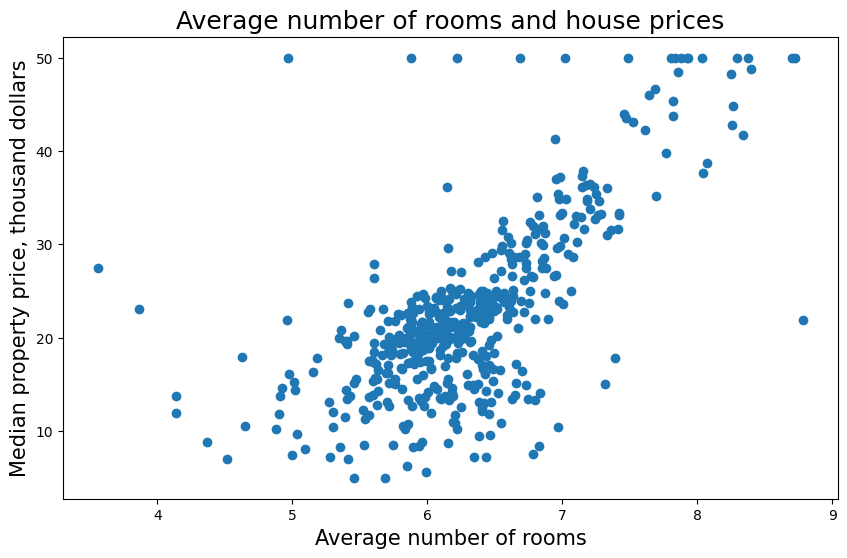

In [11]:
# let's set the size and build the second graph
plt.figure(figsize = (10,6))
plt.scatter(x2, y)

# adding signatures
plt.xlabel('Average number of rooms', fontsize = 15)
plt.ylabel('Median property price, thousand dollars', fontsize = 15)
plt.title('Average number of rooms and house prices', fontsize = 18)

### Step 4. Selection and selection of features

In [12]:
# let's select the features with the highest correlation with the target variable
# and put them in the variable X
X = boston_df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]

In [13]:
# We will put the target variable in the y variable
y = boston_df['MEDV']

In [14]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [15]:
from sklearn.model_selection import train_test_split

# let's split the data into a training and a test sample,
# the size of the test sample will be 30%,
# and we'll also set a reference point for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [16]:
# let's look at the new dimension of the training
print(X_train.shape, y_train.shape)

# and the test sample
print(X_test.shape, y_test.shape)

(354, 5) (354,)
(152, 5) (152,)


### Step 5. Training and evaluation of the quality of the model

In [17]:
# importing linear regression from the set of linear models in the sklearn library
from sklearn.linear_model import LinearRegression

# create an object of this class and write it to the model variable
model = LinearRegression()

# let's train the model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# based on several independent variables (X),
# we predict the price of housing (y)
y_pred = model.predict(X_test)

# let's output the first five values using the index range
print(y_pred[:5])

[26.62981059 31.10008241 16.95701338 25.59771173 18.09307064]


In [19]:
# importing the root of the root error function
from sklearn.metrics import root_mean_squared_error

# let's compare the test and forecast values of housing prices
print('Root Mean Squared Error (RMSE):', root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 5.107447670220913


In [20]:
# let's look at another metric, the coefficient of determination R2
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.65


### Additional materials

Method.The .score() of the Linear Regression class gives the same result as the .r2_score() metric, but for calculation we pass it X_test and y_test.

In [21]:
r2_score(y_test, y_pred), model.score(X_test, y_test)

(0.6499135956539921, 0.6499135956539921)

Adjusted coefficient of determination

In [22]:
# let's take n and k for the test data
n, k = X_test.shape[0], X_test.shape[1]
n, k

(152, 5)

In [23]:
# let's substitute them into the formula
1 - (1 - model.score(X_test, y_test)) * ((n - 1) / (n - k - 1))

0.6379243352311836